# Projeto 2 Ciência dos Dados - Engenharia Insper 2021.1
## Integrantes: Rafael Pascarelli Nicheri e Vinícius Matheus Morales
____________________________________________________________________________________________________________________________
## Objetivo:
### - Com esse projeto pretendemos prever o valor do aluguel de um determinado imóvel com base nos seguintes dados:
- Tamanho do terreno em m²;
- Quantidade de quartos;
- Quantidade de banheiros;
- Quantidade de suítes;
- Quantidade de vagas de carro;
- Se possui elevador;
- Se possui móveis;
- Se possui piscina;
- Se é uma construção nova;
- Região da cidade de São Paulo onde o imóvel se encontra.

## 1. Importando as bibliotecas que serão utilizadas no projeto e lendo o Dataset que será utilizado para as previsões

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [59]:
data = pd.read_csv('sao-paulo-properties-april-2019.csv')

### 1.1 Filtrando o Dataset em um DataFrame que contenha apenas os aluguéis e exclua as vendas

In [60]:
rent_filter = data['Negotiation Type'] == 'rent' # Filtro para usarmos apenas dados de aluguel
rent_data = data.loc[rent_filter, :] # Aplicando o filtro para mostrar apenas dados de alugel
rent_data

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


(array([1., 0., 1., 0., 1., 0., 0., 0., 0., 3.]),
 array([1250., 1385., 1520., 1655., 1790., 1925., 2060., 2195., 2330.,
        2465., 2600.]),
 <BarContainer object of 10 artists>)

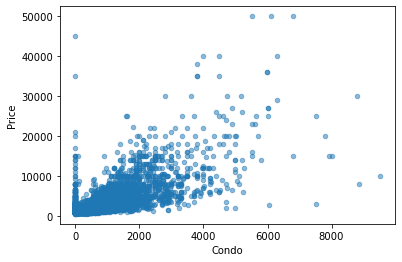

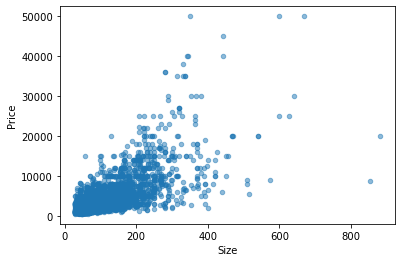

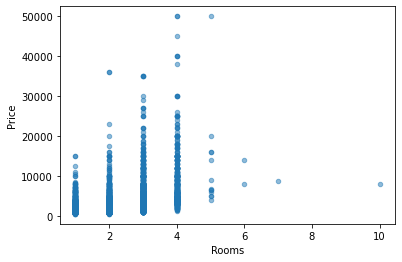

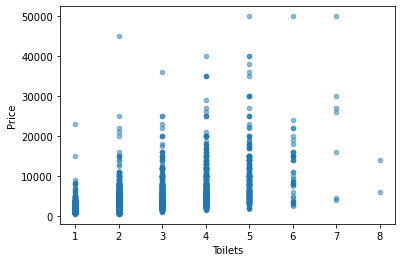

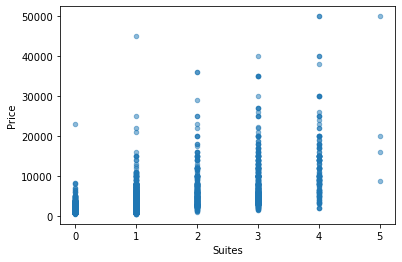

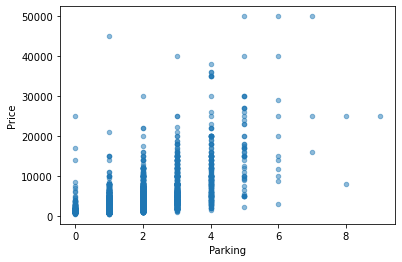

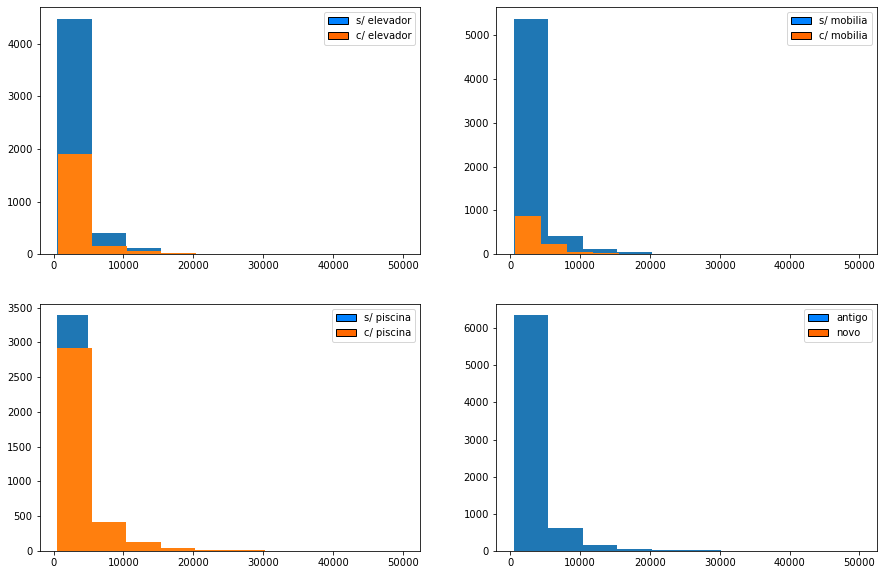

In [91]:
#classificando as variaveis
'Condo = Quantitativa'
'Size = Quantitativo'
'Rooms = Quantitativo'
'Toilets = Quantitativo'
'Suites = Quantitativo'
'Parking = Quantitativo'
'Elevator = Qualitativo'
'Furnished = Qualitativo'
'Swimming Pool = Qualitativo'
'New = Qualitativo'
'Price = Quantitativo'

'---------------------------------------------------------------------------------------------------------------------------'
#graficos


#condo_price
condo_price=rent_data.loc[:, ['Price', 'Condo']]
condo_price.plot.scatter(x='Condo', y='Price', alpha=0.5);

#size_price
size_price=rent_data.loc[:, ['Price', 'Size']]
size_price.plot.scatter(x='Size', y='Price', alpha=0.5);

#rooms_price
rooms_price=rent_data.loc[:, ['Price', 'Rooms']]
rooms_price.plot.scatter(x='Rooms', y='Price', alpha=0.5);

#toilets_price
toilets_price=rent_data.loc[:, ['Price', 'Toilets']]
toilets_price.plot.scatter(x='Toilets', y='Price', alpha=0.5);

#suites_price
suites_price=rent_data.loc[:, ['Price', 'Suites']]
suites_price.plot.scatter(x='Suites', y='Price', alpha=0.5);

#parking_price
parking_price=rent_data.loc[:, ['Price', 'Parking']]
parking_price.plot.scatter(x='Parking', y='Price', alpha=0.5);

# #elevator_price
# elevator_price=rent_data.loc[:, ['Price', 'Elevator']]
# elevator_price1=pd.crosstab(elevator_price['Price'], elevator_price['Elevator'])
# ax=elevator_price1.plot.hist(alpha=0.5);

# #furnished_price
# furnished_price=rent_data.loc[:, ['Price', 'Furnished']]
# furnished_price1=pd.crosstab(furnished_price['Price'], furnished_price['Furnished'])
# ax=furnished_price1.plot.hist(alpha=0.5);

plt.figure(figsize=(15,10))

#elevator_price
elevator_filter = rent_data.loc[rent_data['Elevator'] == 0, 'Price']
elevator_filter1 = rent_data.loc[rent_data['Elevator'] == 1, 'Price']
plt.subplot(221)
#legendas
elevator_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]]
elevator_2= ["s/ elevador","c/ elevador"]
plt.legend(elevator_1, elevator_2)
plt.hist(elevator_filter)
plt.hist(elevator_filter1)

#furnished_price

furnished_filter = rent_data.loc[rent_data['Furnished'] == 0, 'Price']
furnished_filter1 = rent_data.loc[rent_data['Furnished'] == 1, 'Price']
plt.subplot(222)
#legendas
furnished_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]]
furnished_2= ["s/ mobilia","c/ mobilia"]
plt.legend(furnished_1, furnished_2)
plt.hist(furnished_filter)
plt.hist(furnished_filter1)

#swimmingpool_price
swimmingpool_filter = rent_data.loc[rent_data['Swimming Pool'] == 0, 'Price']
swimmingpool_filter1 = rent_data.loc[rent_data['Swimming Pool'] == 1, 'Price']
plt.subplot(223)
#legendas
piscina_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]]
piscina_2= ["s/ piscina","c/ piscina"]
plt.legend(piscina_1, piscina_2)
plt.hist(swimmingpool_filter)
plt.hist(swimmingpool_filter1)

#new_price
new_filter = rent_data.loc[rent_data['New'] == 0, 'Price']
new_filter1 = rent_data.loc[rent_data['New'] == 1, 'Price']
plt.subplot(224)
#legendas
novo_1 = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cmap(0.25) ,cmap(0.8)]]
novo_2= ["antigo","novo"]
plt.legend(novo_1, novo_2)
plt.hist(new_filter, density=False)
plt.hist(new_filter1, density=False)

### 1.2 Reordenando os dados para ficarem em uma ordem mais legível

In [63]:
# DataFrame com os dados relevantes
relevant_data = rent_data.iloc[:, :-5]
relevant_data = relevant_data.loc[:, ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'Price']]
relevant_data.sort_values(['New', 'Price'], ascending=False)

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Price
10630,700,86,3,2,1,2,1,0,1,1,2600
2720,600,42,1,2,1,2,1,1,1,1,2500
2722,600,42,1,2,1,2,1,1,1,1,2500
5184,600,62,2,2,1,1,1,0,1,1,1800
4599,420,35,1,1,0,1,1,0,1,1,1600
...,...,...,...,...,...,...,...,...,...,...,...
288,0,40,1,2,1,1,0,0,0,0,500
2878,36,45,1,2,1,0,0,0,1,0,500
4427,0,30,1,1,0,0,0,0,0,0,500
4486,380,66,2,1,0,1,0,0,0,0,500


## 2. Preprocessamento de dados

In [10]:
# Transformando int em float para auxiliar no dimensionamento de recursos
for i in relevant_data.keys():
    relevant_data[i] = relevant_data[i].astype(float)

In [11]:
X = relevant_data.iloc[:, :-1].values # Separando as variáveis independentes
Y = relevant_data.iloc[:, -1].values # Separando a variável dependente

### 2.1 Separando os dados em Treino e Teste

In [12]:
# Separando os dados em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 2.2 Dimensionamento de recursos

In [13]:
# Dimensionamento de recursos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :5] = sc.fit_transform(X_train[:, :5])
X_test[:, :5] = sc.transform(X_test[:, :5])

# Regressões

## 3. Regressão por Árvore de Decisão

In [14]:
# Aplicar o Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [15]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 1980.  2000.]
 [ 3900.  4200.]
 [ 4000.  1200.]
 ...
 [16000. 12000.]
 [ 1600.  3800.]
 [ 6000.  4000.]]


### 3.1 Precisão por R²

In [16]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.45057525165276247

### 3.2 Plotagem de gráfico para visualizar a precisão

In [17]:
# Pensar em como fazer

## 4. Regressão linear simples

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[  898.07  2000.  ]
 [ 3217.74  4200.  ]
 [ 1266.47  1200.  ]
 ...
 [12239.9  12000.  ]
 [ 2614.39  3800.  ]
 [ 6602.59  4000.  ]]


### 4.1 Precisão por R²

In [20]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.5902859641333933

### 4.2 Plotagem de gráfico para visualizar precisão

In [21]:
# Pensar em como fazer

## 5. Regressão por Vetores de Suporte

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, Y_train)

SVR()

In [23]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 1973.24  2000.  ]
 [ 2187.24  4200.  ]
 [ 1668.92  1200.  ]
 ...
 [ 2648.22 12000.  ]
 [ 2126.93  3800.  ]
 [ 2618.16  4000.  ]]


### 5.1 Precisão por R²

In [24]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.020587952218642736

### 5.2 Plotagem de gráfico para visualização

In [25]:
# Pensar em como fazer

## 6. Regressão por Floresta Aleatória

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 1902.74  2000.  ]
 [ 3673.5   4200.  ]
 [ 3138.34  1200.  ]
 ...
 [13250.49 12000.  ]
 [ 2870.25  3800.  ]
 [ 5018.12  4000.  ]]


### 6.1 Precisão por R²

In [28]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6756038273768898

### 6.2 Plotagem de gráfico para visualização

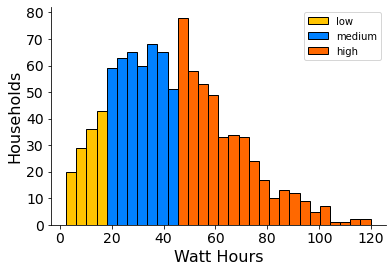

In [68]:
# Pensar em como fazer
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

data = np.random.rayleigh(size=1000)*35

N, bins, patches = plt.hist(data, 30, ec="k")

cmap = plt.get_cmap('jet')
low = cmap(0.7)
medium =cmap(0.25)
high = cmap(0.8)


for i in range(0,4):
    patches[i].set_facecolor(low)
for i in range(4,11):
    patches[i].set_facecolor(medium)
for i in range(11,30):
    patches[i].set_facecolor(high)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium, high]]
labels= ["low","medium", "high"]
plt.legend(handles, labels)

plt.xlabel("Watt Hours", fontsize=16)  
plt.ylabel("Households", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

plt.gca().spines["top"].set_visible(False)  
plt.gca().spines["right"].set_visible(False)

plt.show()